In [1]:
%cd ..

/home/clement/Dropbox/MVA/Graphs in ML/project/graphConvNet


In this notebook we demonstrate how to perform the graph coarsening and max-pooling with the same time complexity than for a 1-dimensionnal maxpooling.

In [2]:
import scipy.misc
import matplotlib.pyplot as plt
from src.GraphMaxPooling import GraphMaxPooling
%matplotlib inline

In [4]:
mnist = scipy.misc.imread("data/mnist.png", flatten=True) / 255
# reshape the signal to a vector, r
x = mnist.reshape((-1,))

In [5]:
# take a grid as graph
W = GraphMaxPooling.generate_grid(*mnist.shape)

In [6]:
# instantiate a pooling object to perform 4*(coarsening + maxpooling)
foo_pooling = GraphMaxPooling(W, 8)

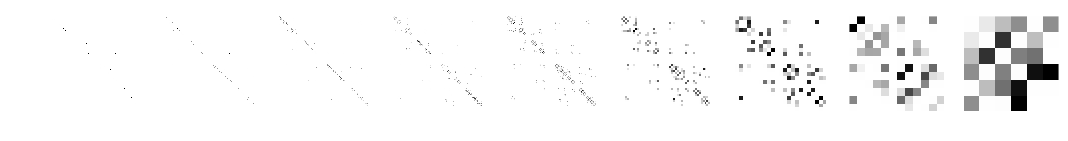

In [7]:
# plot all the W's from the coarsened graphs
foo_pooling.plot_coarsened_W_s()

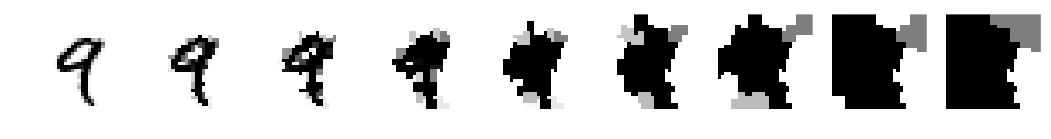

In [8]:
# plot the signal reprojected on the initial graph
foo_pooling.plot_pooled_images(x)

In [9]:
# for instance, let's retrieve the Laplacians for all scales
laplacians = foo_pooling.get_laplacians(how='unn')
print([l.shape for l in laplacians])

[(1536, 1536), (768, 768), (384, 384), (192, 192), (96, 96), (48, 48), (24, 24), (12, 12), (6, 6)]


In [10]:
# we can also get a specific pooled signal: e.g. what's the signal after 6 coasenings?
foo_pooling.one_max_pooling(x, 6)

array([ 0.        ,  0.98823529,  0.        ,  0.98431373,  0.        ,
        0.        ,  0.57647061,  0.        ,  0.98823529,  0.98823529,
        0.        ,  0.        ,  0.98823529,  0.98823529,  0.98823529,
        0.37254903,  0.        ,  0.        ,  0.        ,  0.        ,
        0.98431373,  0.        ,  0.        ,  0.        ])

In [11]:
# Finally (and most imoprtantely) we can retrieve the way we should reorder the nodes 
# before starting our network to get an efficient 1d like max-pooling
foo_pooling.new_order

array([   0,   28,   29, ..., 1101, 1102, 1103])

## Computationnal time

In [12]:
%timeit foo_pooling.max_pooling(x)

10000 loops, best of 3: 28.1 µs per loop
